<a href="https://colab.research.google.com/github/khanfs/Modelling-Biology/blob/main/02_Discrete_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 02: Discrete systems

## What is a dynamical system?

A dynamical system is a _system that changes with respect to time_.
Dynamical systems consist of a _space_ (in the mathematical sense) and a _rule_ which describes the time-evolution of every point in that space.

There are two types of dynamical system, distinguished by whether time is modelled as _discrete_ or _continuous_.

Discrete time means that each 'time point' is distinct, and that variables 'jumps' from one time point to the next.
For example, the total number of animals per year.
This is mathematically equivalent to the integers (0,1,2,3,...).

Continuous time means that variables change 'smoothly', variables have a particular value for only an infinitesimally short amount of time.
For example, electrical brain activity recorded from a EEG.
This is mathematically equivalent to the real number line.


## Discrete dynamical systems

Discrete dynamical systems generally take the form of a _recurrence relation_ (also known as a _difference equation_ or a _map_).
This is a function, $f$, which tells us the state of the system at time $t+1$ if we know the state at time $t$:

$$ x_{t+1} = f(x_t)$$

So if we know the value of $x_0$, we can calculate the value of $x_1$ and so on.

More generally a recurrence relation can depend on the state of the system at any previous time point:

$$ x_{t+1} = f(x_t, x_{t-1}, x_{t-2}, \ldots)$$

## Example, non-overlapping generations

> Nearly all cicadas spend years underground as juveniles, before emerging above ground for a short adult stage of several weeks to a few months. The seven periodical cicada species are so named because, in any one location, all of the members of the population are developmentally synchronized—they emerge as adults all at once in the same year. This periodicity is especially remarkable because their life cycles are so long—13 or 17 years. [Wikipedia](https://en.wikipedia.org/wiki/Periodical_cicadas#Life_cycle)

Consider a species of cicada which has a 13-year life-cycle.
Cicada generations are synchronised so that all reach adulthood in the same year, when they mate and produce offspring which themselves take 13 years to mature.

### Model outline

**Aim:** To predict the number of cicada that will emerge in any future swarm.

**Scale:** Population-level

**Approach/method:** Discrete dynamical system

**Simplifications:**

- The population size can be approximated with a continuous number.
- No predation.
- Conditions for cicada maturation across decades consistent.
- Male/female ratio is not important, we can use an average fecundity per cicada.
- Deaths before maturation, lack of success of some individuals to mate, etc. all included in the fecundity value.

**Assumptions:**

- Generations never overlap (no immigration).
- Behaviour is based on evolved mechanism, and not reliant on external factors. 
- Cicadas have sufficient resources to grow optimally (no carrying-capacity).

### Model mathematics

Let the population size at generation $t$ be given by $N_t$.
The average fecundity is given by $r$.

So the number of cicadas in the next generation will be given by:
$$N_{t+1} = f(N_t) = r N_t $$

We would like an equation for the number of cicadas in generation $t$ given the number in generation $0$.
Let $f\circ g = f(g(x))$.
First imagine that we want to know the population in generation $t$ given the number in generation $t-2$:

$$N_{t} = f(N_{t-1}) = f\circ f(N_{t-2}) = r^2 N_{t-2}$$

We can generalise this to the following:

$$N_{t} = \underbrace{f \circ \ldots \circ f}_\text{$t$ times}(N_0) = r^t N_0 $$

Where $N_0$ is the population at time $0$.

### Investigating the model

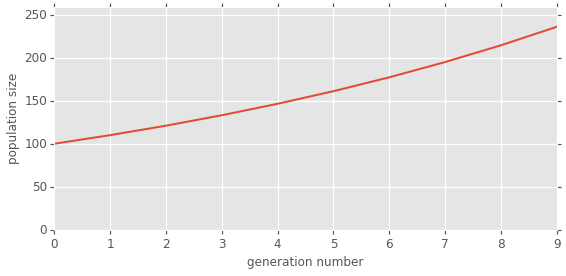

<function python.f02.plot_expm>

In [ ]:
from python.f02 import *
%matplotlib inline
    
interact(plot_expm)

### Model criticisms

- ...

## Carrying-capacity

The _carrying-capacity_ is the maximum population size for a species in an environment.

**Careful:** there are two common, contradictory, technical definitions of the carrying capacity:

- The maximum population size that the environment can _sustain indefinitely_ (i.e. at equilibrium).
- The maximum population size _theoretically possible_. This is the definition I will use.

### Modifying assumptions/simplifications

**Simplifications:**

- The carrying capacity includes food, predation effects, etc.

**Assumptions:**

- ~~Cicadas have sufficient resources to grow optimally (no carrying-capacity).~~
- There is a maximum 'carrying-capacity' for the cicadas in their enviroment.

### Modifying the model

Let $K$ be the maximum population size _possible_ for the cicada population.
Then $\frac{N_t}{K}$ is the population of generation $t$ as a proportion of the carrying capacity.

We need to choose a _penalty function_, which is negative if $\frac{N_t}{K}>1$ (positive otherwise).
We'll use $\left(1 - \frac{N_t}{K}\right)$.
Now our model can be written as:

$$ N_{t+1} = r\, N_t \left(1 - \frac{N_t}{K}\right)$$

## Non-dimensionalisation

So far we've considered our model in terms of the number of cicadas.
However, it is often useful to remove the units from our models, to _non-dimensionalise_ them.
Reasons for this include:

- A model that is applicable to multiple scenarios.
- We often can reduce the number of parameters in the model.

Let $x_t = \frac{N_t}{K}$ (dimensionless), then we get:

$$x_{t+1} = r\, x_t \left(1 - x_t\right)$$

Note that our new equation has only one variable (instead of two).
This equation is known as the _logistic map_.

### Exploring behaviour, varying $r$

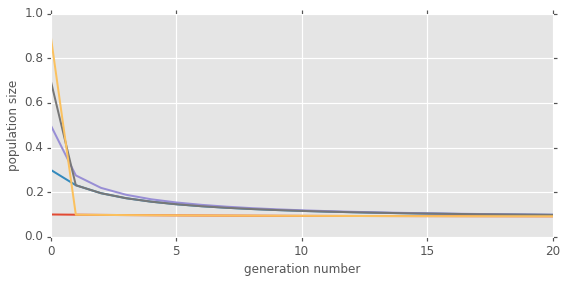

<function python.f02.plot_lm>

In [ ]:
interact(plot_lm)

### Cobweb diagrams

A _cobweb diagram_ is a graphical method for understanding the behaviour of a steady-state.

1. Create a graph with axes $x = x_t$, $y = x_{t+1}$.
2. Plot the line $y = x$.
3. Plot the function $y = f(x)$.
4. Start at the point $x_0$ on the x-axis.
5. Draw a vertical line until it intersects the function line.
6. Draw a horizontal line until it intersects the line $y=x$.
7. Repeat steps 5 and 6.

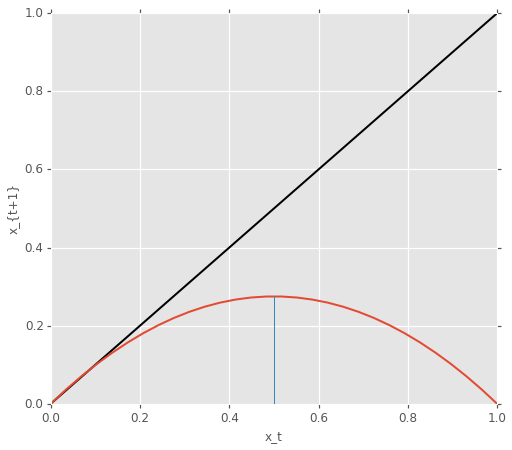

<function python.f02.plot_lm_web>

In [ ]:
interact(plot_lm_web)

## Biological interpretation

For low values of $r$, the fecundity, the population eventually reaches the same steady-state, no matter the value of $x_0$ so long as $0<x_0<1$.

- If $r\leq 1$, then this steady-state is at zero, and so the population dies out.
- If $1<r<3$, then this steady-state is at a non-zero point.

## Steady-states

We are often interested in the long-term behaviour of a system (as opposed to its _transient_ behaviour).

The simplest long-term behaviour is for the system to reach a _steady-state_, where the time-evolution of the system becomes fixed.
The state reached can also be known as an _equilibrium_ or a _fixed point_.

Mathematically, a discrete dynamical system is at steady-state when:

$$ x^\ast = f(x^\ast) $$

For the logistic map:

$$\begin{aligned}
    x^\ast &= r\, x^\ast \left(1 - x^\ast\right) \\
    0 &= r\, x^\ast \left(1 - x^\ast\right) - x^\ast \\
    0 &= \left(r \left(1 - x^\ast\right) - 1\right)\, x^\ast \\
    0 &= \left(1 - \tfrac{1}{r} - x^\ast\right)\, x^\ast \\
    \end{aligned}$$
    
So either: $x^\ast = 1 - \tfrac{1}{r}$ or $x^\ast = 0$.

### Stability of steady-states

Steady-states can be either _stable_ or _unstable_.

Consider a small perturbation of a system away from steady-state.
What happens?

![Stable vs. unstable](images/02_stable.png)

For a system at a stable steady-state, small perturbations do not significantly change the state of the system.

For a system at an unstable steady-state, small perturbations can significantly change the state of the system.

**How do we find the stability of a steady-state?**
We're interested in the behaviour very close to the steady-state.
The general approach is to investigate the behaviour of the _linearised_ system near the steady-state.
This means we can use existing linear tools to investigate the system.

Let $x_t = x^\ast + y_t$, then:

$$\begin{aligned}
    x_{t+1} &= f(x_t) \\
    x^\ast + y_{t+1} &= f(x^\ast + y_t) \\
    y_{t+1} &= f(x^\ast + y_t) - x^\ast
    \end{aligned}$$

We need to linearise the function $f$.
We do this using a [_Taylor series expansion_](http://mathworld.wolfram.com/TaylorSeries.html).

> A Taylor series is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point. — [Wikipedia](https://en.wikipedia.org/wiki/Taylor_series)

We only need to consider the first two terms of the Taylor expansion.
(We assume everything else is much smaller in magnitude.)

$$f(x) = f(a) + f^\prime(a) (x-a) + \ldots $$

We have $x=x^\ast + y_t$, $a = x^\ast$, so:

$$\begin{aligned}
    f(x^\ast + y_t) &= f(x^\ast) + f^\prime(x^\ast) (x^\ast + y_t - x^\ast)\\
    f(x^\ast + y_t) &= x^\ast + f^\prime(x^\ast)\, y_t
    \end{aligned}$$
    
This means:

$$\begin{aligned}
    y_{t+1} &= f(x^\ast + y_t) - x^\ast \\
    y_{t+1} &= x^\ast + f^\prime(x^\ast)\, y_t - x^\ast \\
    y_{t+1} &= f^\prime(x^\ast)\, y_t
    \end{aligned}$$
    
Similarly to before, if we want to know $y_t$ given $y+0$:

$$y_t = \underbrace{f^\prime \circ \ldots \circ f^\prime}_\text{$t$ times}(y_0) = \left[\,f^\prime(x^\ast)\right]^t y_0 $$

So we are interested in the derivative of $f$:

- if $\left|\, f^\prime(x^\ast)\, \right| < 1$ then $y_t\rightarrow 0$ as $t\rightarrow \infty$. The perturbation gets smaller as time increases, and so the steady-state is stable.
- if $\left|\, f^\prime(x^\ast)\, \right| > 1$ then $y_t$ grows as $t\rightarrow \infty$. The perturbation gets larger as time increases, and so the steady-state is unstable.

## Steady-states of logistic map

Remember the steady-states of the logistic map were: $x^\ast = 1 - \tfrac{1}{r}$ and $x^\ast = 0$.
When would you expect these to be stable or unstable?

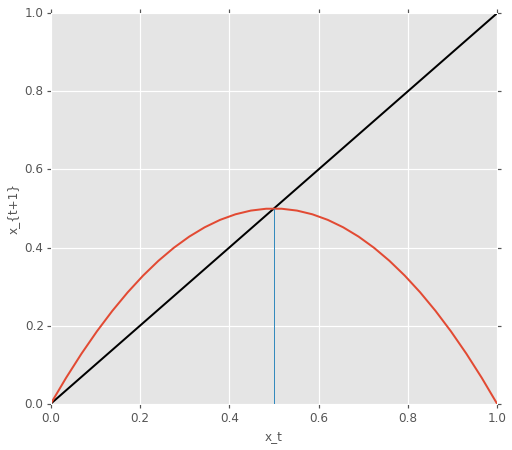

<function python.f02.plot_lm_web>

In [ ]:
interact(plot_lm_web, r=fixed(2), n_iter=fixed(30))

For the logistic map:

$$\begin{aligned}
    f(x) &= r\, x \left(1 - x\right) \\
    f^\prime(x) &= r\, (1-x) - r\,x = r\, (1 - 2 x)
    \end{aligned}$$
    
The value of the derivative at each steady-state is:

$$\begin{aligned}
    f^\prime(0) &= r \\
    f^\prime(1-\tfrac{1}{r}) &= 2-r \\
    \end{aligned}$$

Both depend on the value of $r$:

- The steady-state $x^\ast = 0$ is stable if and only if $|r|<1$.
- The steady-state $x^\ast = 1-\tfrac{1}{r}$ is stable if and only if $|2-r|<1$, that is if $1<r<3$.

## Bifurcations

What happens at $r=1$?

Imagine $r$ increasing smoothly from $r=0.9$ to $r=1.1$, when $r=1.0$ the two steady-states are suddenly equal, and they _exchange their stability_.
This is known as a _transcritical bifurcation_.

In general a _bifurcation_ is a qualitative change in a system which occurs as a result of varying the value of a parameter.

Are bifurcations an interesting feature of models of biological systems?

### Bifurcation diagram

The simplest way of understanding a bifurcation is to draw its bifurcation diagram.
This shows the effect of varying the parameter of interest (along the x-axis) on the output of the system.

Often unstable nodes will be drawn using dashed lines, and stable nodes using solid lines.

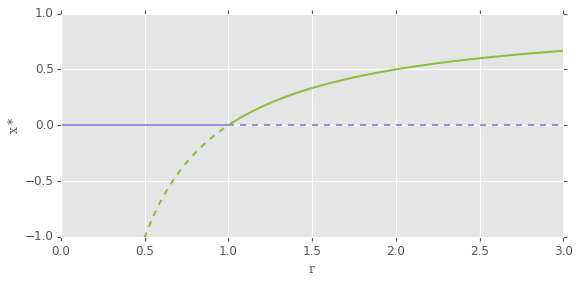

In [ ]:
plot_lm_bif1()

### Further bifurcations, chaos in the logistic map

The logistic map displays further interesting behaviours for $3\leq r\leq 4$.
The system undergoes multiple _period doubling_ bifurcations.

First, at $r=3$ and nearby we can see oscillatory behaviour.
It is possible to find the values of these points by solving the equation $x^\ast = f(f(x^\ast))$.

As $r$ increases further, the system undergoes _infinitely_ many further period doubling bifurcations.
This leads to cycles of infinite length at $r\approx 3.57$ — equivalently,  the dynamics become _aperiodic_. 
If $r<4$ and $0\leq x_0\leq 1$ then the system remains _bounded_ in the range 0 to 1.
Finally, the system satisfies a condition known as _sensitive dependence on intial conditions_, this equivalent to the [Butterfly effect](https://en.wikipedia.org/wiki/Butterfly_effect) known in popular culture.
These three properties are sufficient to say that the system is _chaotic_.

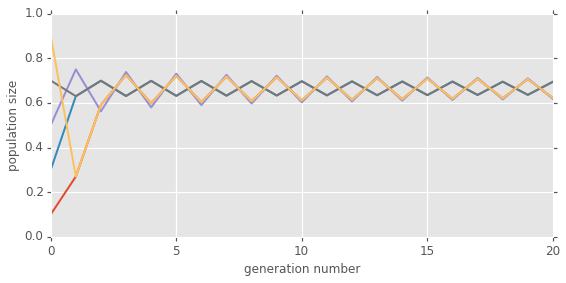

<function python.f02.plot_lm>

In [ ]:
interact(plot_lm, r=(3,4,0.05))

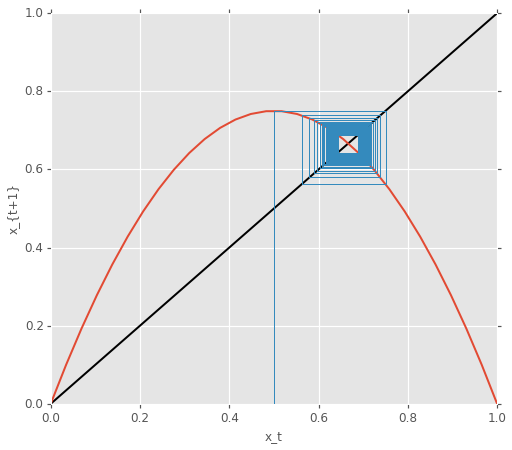

<function python.f02.plot_lm_web>

In [ ]:
interact(plot_lm_web, r=(3,4,0.05), n_iter=fixed(100))

### Famous bifurcation diagram of the logistic map

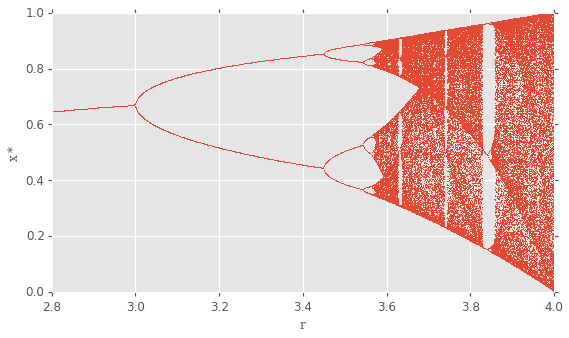

In [ ]:
plot_lm_bif2()

## Biological significance of chaos

Is chaos biologically interesting?

## Backtracking, biological implication of the logistic map

What has the investigation of the logistic map told us about cicada populations?

## Example, annual plants

Consider a species of annual plant that flowers and produces seeds on an annual schedule.
Once the plant has produced seeds it dies.
Seeds can stay underground for one or more winters before maturing into adult plants.

![Flower propagation](images/02_flowers.png)

### Model outline

**Aim:** To investigate how the relative success of germination in years 1 and 2 affects the population dynamics of the plant species.

**Scale:** Population-level

**Approach/method:** Discrete dynamical system

**Simplifications:**

- The population size can be approximated with a continuous number.
- No predation.
- Conditions for plant maturation consistent across years.
- Seeds can only survive two winters.

**Assumptions:**

- Generations (of mature plants) never overlap, plants can never survive winter.

### Mathematics

We have the variables:

$$\begin{aligned}
    p_t &= \text{number of plants in year $t$} \\
    s_t &= \text{total number of one year old seeds} \\
    s^\prime_t &= \text{total number of two year old seeds}
    \end{aligned}$$

We have the parameters:

$$\begin{aligned}
    \gamma &= \text{number of seeds produced per plant} \\
    \sigma &= \text{fraction of seeds that survive winter} \\
    \alpha &= \text{fraction of 1 year old seeds that germinate} \\
    \beta &= \text{fraction of 2 year old seeds that germinate}
    \end{aligned}$$
    
We can calculate the number of plants that grow in year $t$:

$$ p_t = \alpha s_t + \beta s^\prime_t $$

We can also calculate the numbers of one and two year old seeds in year $t$:

$$\begin{aligned}
    s_{t+1} = \sigma \gamma p_t \\
    s^\prime_{t+1} = \sigma (1 - \alpha) s_t
    \end{aligned}$$

Combining these gives:

$$\begin{aligned}
    p_{t+1} &= \alpha s_{t+1} + \beta s^\prime_{t+1} \\
    p_{t+1} &= \alpha \sigma \gamma p_t
        + \beta \sigma (1 - \alpha) s_t \\
    p_{t+1} &= \alpha \sigma \gamma p_t
        + \beta \sigma^2 (1 - \alpha) \gamma p_{t-1} \\
    \end{aligned}$$

So we have $ p_{t+1} = f(p_t,p_{t-1}) $.

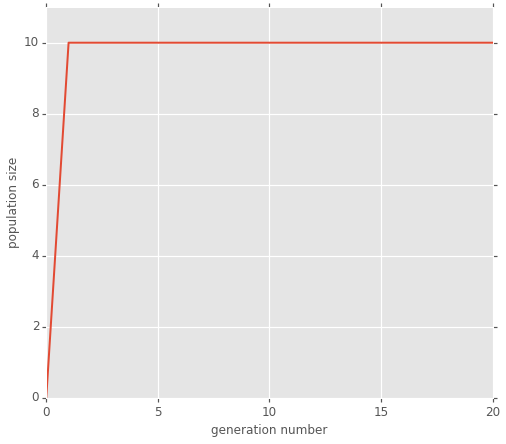

<function python.f02.plot_pm>

In [ ]:
interact(plot_pm)

### Analytical solution

It's possible to write the model equation in the form of two (linear) simultaneous equations:

$$\begin{aligned}
    p_{t+1} &= \alpha \sigma \gamma p_t
        + \beta \sigma (1 - \alpha) s_t \\
    s_{t+1} &= \sigma \gamma p_t
    \end{aligned}$$

We've seen that linear problems can often have solutions of the form $x_t=c\,\lambda^t$.
So we could try a solution $p_t = c \lambda^t$:

$$\begin{aligned}
    p_{t+1} &= \alpha \sigma \gamma p_t
        + \beta \sigma^2 (1 - \alpha) \gamma p_{t-1} \\
    c\lambda^{t+1} &= \alpha \sigma \gamma c \lambda^t
        + \beta \sigma^2 (1 - \alpha) \gamma c \lambda^{t-1} \\
    0&= \lambda^2 - \alpha \sigma \gamma \lambda
        - \beta \sigma^2 (1 - \alpha) \gamma \\
    \end{aligned}$$
    
Using the quadratic formula:

$$ \lambda_{\pm} = \frac{\sigma\gamma\alpha}{2}\left(1 \pm \sqrt{1 + \delta} \right) \text{, where } \delta = \tfrac{4\beta(1 - \alpha)}{\gamma\alpha^2}$$

So there are two solutions.

For linear problems, any linear combination of solutions is another solution.
So we have:

$$ p_t = c_1 \lambda_+^t + c_2 \lambda_-^t $$

The $ \lambda_{1,2}$ are known as the _eigenvalues_ of the system.
Their magnitude determines the behaviour of the system (and varying the value of the eigenvalues can cause bifurcations).

For example, consider when $\frac{\beta}{\alpha}$ is very small, then $\delta\ll 1$.
We then have:

$$ \lambda_+ \approx\sigma\gamma\alpha,\; \lambda_{-}=0$$

This means our system can be described by the equation:

$$ p_t = c_1 \lambda_+^t$$

The population will only grow if $\lambda_+\leq 1$, so $\gamma=\frac{1}{\sigma\alpha}$, giving a minimum value to the number of seeds produced per plant.

We will come back to these ideas in future sessions.

In [ ]:
# Jupyter notebook setup
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())